In [2]:
import datetime
now = datetime.datetime.now()
print ("Current date and time: ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time: 
2022-07-03 11:45:05


In [3]:
# installing dependencies
#
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd

##### Read in Air Temp. & Snow Depth Datasets from from GLDAS 

### 3 hr interval Snow Depth from 2000-01-01 00:00:00 to 2021-05-17 18:00:00

In [4]:
# read in CSV file for each winter
#
snow_depth = pd.read_csv ("D:/Users/aster/Desktop/SNOW_DEPTH_2022_07_01/SnowDepth_WhiteDzud_3hr.csv")
df1 = pd.DataFrame(snow_depth)
df1

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
0,2000-01-01 00:00:00,0.020283,0.163833,0.009550,0.096350,0.059797,0.031030,0.009782,0.005413,0.008964,...,0.108549,0.075811,0.090601,0.009469,0.024535,0.020010,0.001197,0.277315,0.013051,0.060852
1,2000-01-01 03:00:00,0.020587,0.166380,0.010599,0.102729,0.059687,0.031119,0.010982,0.006481,0.011329,...,0.108284,0.086285,0.092040,0.009875,0.028300,0.019886,0.001326,0.277718,0.013982,0.061050
2,2000-01-01 06:00:00,0.020758,0.168298,0.010686,0.104631,0.059558,0.031808,0.012226,0.012007,0.011671,...,0.108130,0.087865,0.092201,0.010242,0.032270,0.019819,0.001567,0.278051,0.023664,0.060873
3,2000-01-01 09:00:00,0.020753,0.170367,0.011013,0.104701,0.059515,0.032122,0.013671,0.013168,0.011998,...,0.108207,0.087865,0.092158,0.010644,0.032287,0.019830,0.002670,0.278708,0.024279,0.060922
4,2000-01-01 12:00:00,0.020737,0.172809,0.011085,0.104693,0.059494,0.036289,0.015174,0.014477,0.012026,...,0.108260,0.087876,0.092158,0.011824,0.032314,0.019814,0.003457,0.279360,0.024738,0.060971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62458,2021-05-17 06:00:00,0.007534,0.040299,0.000177,0.003062,0.000195,0.000130,0.000000,0.000000,0.000119,...,0.057832,0.013855,0.003371,0.000000,0.000942,0.000044,0.000000,0.016939,0.000012,0.016802
62459,2021-05-17 09:00:00,0.017269,0.038307,0.000541,0.014380,0.000000,0.000058,0.000000,0.000000,0.000899,...,0.064206,0.040386,0.002866,0.000000,0.000808,0.000009,0.000000,0.014812,0.000000,0.023617
62460,2021-05-17 12:00:00,0.026892,0.037231,0.001034,0.031798,0.000038,0.000045,0.000000,0.000040,0.000511,...,0.069382,0.065363,0.004733,0.000000,0.010807,0.020670,0.000000,0.012470,0.006496,0.024374
62461,2021-05-17 15:00:00,0.030476,0.037139,0.001075,0.033557,0.000043,0.000045,0.000000,0.001244,0.000487,...,0.070322,0.064970,0.005639,0.000000,0.027397,0.040836,0.000000,0.012469,0.010414,0.024310


In [5]:
df1.dtypes

DateTime         object
Arkhangai       float64
BayanUlgii      float64
Bayankhongor    float64
Bulgan          float64
DarkhanUul      float64
Dornod          float64
Dornogovi       float64
Dundgovi        float64
GoviAltai       float64
Govisumber      float64
Khentii         float64
Khovd           float64
Khuvsgul        float64
Orkhon          float64
Selenge         float64
Sukhbaatar      float64
Tuv             float64
Ulaanbaatar     float64
Umnugovi        float64
Uvs             float64
Uvurkhangai     float64
Zavkhan         float64
dtype: object

In [6]:
df1['DateTime'] = pd.to_datetime(df1['DateTime'])

In [7]:
df1.dtypes

DateTime        datetime64[ns]
Arkhangai              float64
BayanUlgii             float64
Bayankhongor           float64
Bulgan                 float64
DarkhanUul             float64
Dornod                 float64
Dornogovi              float64
Dundgovi               float64
GoviAltai              float64
Govisumber             float64
Khentii                float64
Khovd                  float64
Khuvsgul               float64
Orkhon                 float64
Selenge                float64
Sukhbaatar             float64
Tuv                    float64
Ulaanbaatar            float64
Umnugovi               float64
Uvs                    float64
Uvurkhangai            float64
Zavkhan                float64
dtype: object

In [8]:
#Set DateTime as index
#
df1= df1.set_index('DateTime')
df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,0.020283,0.163833,0.009550,0.096350,0.059797,0.031030,0.009782,0.005413,0.008964,0.014887,...,0.108549,0.075811,0.090601,0.009469,0.024535,0.020010,0.001197,0.277315,0.013051,0.060852
2000-01-01 03:00:00,0.020587,0.166380,0.010599,0.102729,0.059687,0.031119,0.010982,0.006481,0.011329,0.015827,...,0.108284,0.086285,0.092040,0.009875,0.028300,0.019886,0.001326,0.277718,0.013982,0.061050
2000-01-01 06:00:00,0.020758,0.168298,0.010686,0.104631,0.059558,0.031808,0.012226,0.012007,0.011671,0.016777,...,0.108130,0.087865,0.092201,0.010242,0.032270,0.019819,0.001567,0.278051,0.023664,0.060873
2000-01-01 09:00:00,0.020753,0.170367,0.011013,0.104701,0.059515,0.032122,0.013671,0.013168,0.011998,0.017821,...,0.108207,0.087865,0.092158,0.010644,0.032287,0.019830,0.002670,0.278708,0.024279,0.060922
2000-01-01 12:00:00,0.020737,0.172809,0.011085,0.104693,0.059494,0.036289,0.015174,0.014477,0.012026,0.018887,...,0.108260,0.087876,0.092158,0.011824,0.032314,0.019814,0.003457,0.279360,0.024738,0.060971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17 06:00:00,0.007534,0.040299,0.000177,0.003062,0.000195,0.000130,0.000000,0.000000,0.000119,0.000000,...,0.057832,0.013855,0.003371,0.000000,0.000942,0.000044,0.000000,0.016939,0.000012,0.016802
2021-05-17 09:00:00,0.017269,0.038307,0.000541,0.014380,0.000000,0.000058,0.000000,0.000000,0.000899,0.000000,...,0.064206,0.040386,0.002866,0.000000,0.000808,0.000009,0.000000,0.014812,0.000000,0.023617
2021-05-17 12:00:00,0.026892,0.037231,0.001034,0.031798,0.000038,0.000045,0.000000,0.000040,0.000511,0.000000,...,0.069382,0.065363,0.004733,0.000000,0.010807,0.020670,0.000000,0.012470,0.006496,0.024374


In [9]:
#Daily mean
day_mean_df1= df1.resample('D').mean()
day_mean_df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.020611,0.171343,0.010776,0.103279,0.062720,0.040069,1.397477e-02,0.012570,0.011133,0.016864,...,0.108926,0.088989,0.094492,0.012897,0.030600,0.019488,0.003628,0.266873,0.021924,0.060321
2000-01-02,0.030727,0.191508,0.028223,0.109523,0.084351,0.055303,1.732546e-02,0.023521,0.014121,0.009654,...,0.121186,0.115994,0.112353,0.025288,0.032705,0.016872,0.029170,0.200500,0.045558,0.066114
2000-01-03,0.045717,0.193032,0.043282,0.113867,0.083901,0.054838,2.394886e-02,0.029742,0.022189,0.013129,...,0.133872,0.119640,0.112032,0.026326,0.034977,0.017046,0.036531,0.202629,0.056343,0.071932
2000-01-04,0.045875,0.192110,0.047988,0.113236,0.083278,0.054102,2.624052e-02,0.031184,0.037933,0.015300,...,0.139565,0.118564,0.111525,0.026049,0.035337,0.017188,0.033163,0.201805,0.054347,0.071808
2000-01-05,0.045762,0.194991,0.168559,0.112225,0.082492,0.057085,2.549751e-02,0.032030,0.385476,0.015166,...,0.139371,0.117462,0.110785,0.025639,0.034959,0.017028,0.034300,0.201263,0.053271,0.073808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,0.021697,0.079608,0.003475,0.002255,0.000890,0.012453,6.294804e-08,0.000000,0.000184,0.000000,...,0.104556,0.001353,0.007702,0.000159,0.002725,0.000811,0.000000,0.066373,0.000482,0.045371
2021-05-14,0.015018,0.052796,0.002287,0.001619,0.000629,0.006546,0.000000e+00,0.000000,0.000025,0.000000,...,0.080753,0.000503,0.005938,0.000091,0.002146,0.000696,0.000000,0.045373,0.000236,0.027185
2021-05-15,0.007749,0.035828,0.001027,0.000629,0.000233,0.001597,0.000000e+00,0.000000,0.000000,0.000000,...,0.054354,0.000074,0.002749,0.000002,0.001073,0.000294,0.000000,0.029511,0.000036,0.012560


In [10]:
#Divide into 'winters' e.g. August 2020-May 2021
#
day_mean_W00_01_df1 = day_mean_df1.loc['08-2020' : '05-2021']
day_mean_W00_01_df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,0.020400,0.039785,0.005855,0.023436,0.004432,0.000003,1.056540e-07,1.896623e-05,0.002437,0.000010,...,0.052573,0.026480,0.009115,4.853183e-07,0.005087,0.014817,0.000009,0.004493,0.001314,0.024795
2020-08-02,0.015116,0.035200,0.004667,0.011876,0.002692,0.000031,1.142939e-06,4.463066e-05,0.000851,0.000112,...,0.040761,0.011540,0.006272,1.156986e-05,0.004105,0.009566,0.000001,0.003335,0.000894,0.018776
2020-08-03,0.013614,0.028576,0.003379,0.005391,0.001388,0.000017,0.000000e+00,7.990504e-07,0.000222,0.000000,...,0.031445,0.004435,0.003766,0.000000e+00,0.002011,0.003911,0.000000,0.002952,0.000463,0.015430
2020-08-04,0.012335,0.018622,0.002926,0.002719,0.000883,0.000141,2.641349e-08,2.042138e-06,0.000013,0.000002,...,0.021139,0.002035,0.002663,0.000000e+00,0.001192,0.001681,0.000000,0.001291,0.000507,0.009309
2020-08-05,0.005115,0.011629,0.001164,0.001447,0.001409,0.000137,6.744080e-07,1.337903e-05,0.000000,0.000054,...,0.014074,0.001210,0.003109,1.970199e-07,0.001523,0.002159,0.000000,0.000348,0.000096,0.002955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,0.021697,0.079608,0.003475,0.002255,0.000890,0.012453,6.294804e-08,0.000000e+00,0.000184,0.000000,...,0.104556,0.001353,0.007702,1.588977e-04,0.002725,0.000811,0.000000,0.066373,0.000482,0.045371
2021-05-14,0.015018,0.052796,0.002287,0.001619,0.000629,0.006546,0.000000e+00,0.000000e+00,0.000025,0.000000,...,0.080753,0.000503,0.005938,9.111353e-05,0.002146,0.000696,0.000000,0.045373,0.000236,0.027185
2021-05-15,0.007749,0.035828,0.001027,0.000629,0.000233,0.001597,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.054354,0.000074,0.002749,2.182325e-06,0.001073,0.000294,0.000000,0.029511,0.000036,0.012560


In [75]:
# Select provinces that had cold snaps
#
provinces_cold_snaps = day_mean_W00_01_df1.iloc[:, [6,9,13,15,21]]
provinces_cold_snaps

,Dornogovi,Govisumber,Orkhon,Sukhbaatar,Zavkhan
DateTime,,,,,
2020-08-01,1.056540e-07,0.000010,0.026480,4.853183e-07,0.024795
2020-08-02,1.142939e-06,0.000112,0.011540,1.156986e-05,0.018776
2020-08-03,0.000000e+00,0.000000,0.004435,0.000000e+00,0.015430
2020-08-04,2.641349e-08,0.000002,0.002035,0.000000e+00,0.009309
2020-08-05,6.744080e-07,0.000054,0.001210,1.970199e-07,0.002955
...,...,...,...,...,...
2021-05-13,6.294804e-08,0.000000,0.001353,1.588977e-04,0.045371
2021-05-14,0.000000e+00,0.000000,0.000503,9.111353e-05,0.027185
2021-05-15,0.000000e+00,0.000000,0.000074,2.182325e-06,0.012560


In [77]:
run_mean_28_df1 = day_mean_W00_01_df1.rolling(28, center=True).mean()
run_mean_28_df1

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'28-day running mean Snow Depth [m]'}, xlabel='DateTime'>

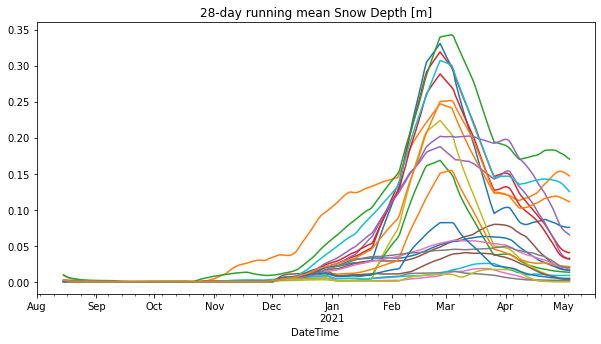

In [12]:
run_mean_28_df1.plot(legend=False, title='28-day running mean Snow Depth [m]', figsize= (10, 5))

In [76]:
run_mean_28_provinces_cold_snaps = provinces_cold_snaps.rolling(28, center=True).mean()
run_mean_28_provinces_cold_snaps

,Dornogovi,Govisumber,Orkhon,Sukhbaatar,Zavkhan
DateTime,,,,,
2020-08-01,NaN,NaN,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN,NaN,NaN
2020-08-03,NaN,NaN,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN,NaN,NaN
2020-08-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-05-13,NaN,NaN,NaN,NaN,NaN
2021-05-14,NaN,NaN,NaN,NaN,NaN
2021-05-15,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'28-day running mean AOIs Snow Depth [m]'}, xlabel='DateTime'>

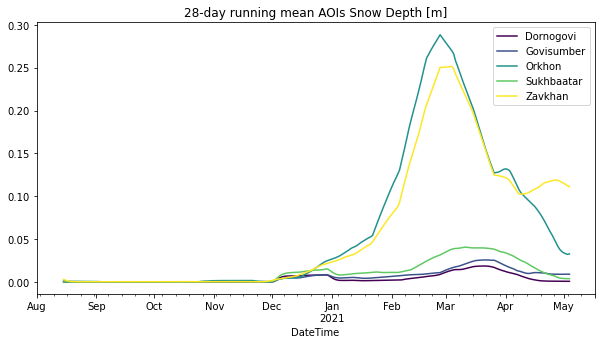

In [79]:
run_mean_28_provinces_cold_snaps.plot(legend=True, title='28-day running mean AOIs Snow Depth [m]', figsize= (10, 5), cmap='viridis')

In [166]:
run_mean_28_provinces_cold_snaps.to_csv('run_mean_28_provinces_cold_snaps_SD_W2020-2021.csv')
print('new csv file was created... ')

new csv file was created... 


---

## Daily Mean Air Temperature from 2000-01-01 to 2021-11-13 in °C

In [13]:
# read in CSV file for each winter
#
air_temp = pd.read_csv ("C:/Users/aster/OneDrive/Desktop/Air_Temperature/AirTemp_ColdDzud_C_DailyMean.csv")
df2 = pd.DataFrame(air_temp)
df2

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
0,2000-01-01,-26.562494,-23.213774,-21.401563,-26.393775,-28.562550,-20.851677,-17.600990,-23.814320,-18.266523,...,-30.352986,-27.313359,-28.587479,-19.218162,-30.078575,-33.850558,-16.577842,-21.116288,-23.789344,-23.056585
1,2000-01-02,-22.856294,-21.700020,-14.846437,-26.826066,-25.640006,-28.079723,-22.615728,-25.474733,-12.212307,...,-25.233630,-28.325338,-26.433683,-28.574628,-27.857652,-28.214586,-11.784267,-18.096907,-19.235685,-18.864553
2,2000-01-03,-24.710436,-32.679842,-21.216367,-25.053685,-28.642681,-33.833305,-19.060248,-22.418509,-20.948301,...,-24.880678,-27.366058,-29.360227,-24.617702,-29.485871,-32.484099,-12.966847,-24.625272,-21.167229,-23.997698
3,2000-01-04,-33.548715,-38.925256,-28.606410,-28.662144,-30.288323,-29.457310,-21.167293,-25.555954,-30.229354,...,-32.156436,-29.664533,-30.086647,-24.334877,-28.555619,-29.821684,-19.337397,-35.680408,-27.623462,-36.766738
4,2000-01-05,-37.187563,-29.595323,-35.287520,-31.449171,-32.867309,-28.626646,-28.064774,-32.569686,-34.865015,...,-36.436839,-32.225105,-32.652804,-29.189361,-33.959773,-34.926976,-29.987616,-29.938650,-34.333414,-37.212091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,2021-11-09,-18.232010,-20.604370,-16.617636,-18.703357,-19.629943,-17.207103,-11.602643,-12.908264,-14.853633,...,-21.748980,-16.944034,-19.697497,-15.608058,-15.839430,-17.250067,-13.107333,-21.879954,-15.202451,-20.646744
7984,2021-11-10,-18.759950,-18.612785,-16.193951,-18.418275,-19.170675,-17.463098,-11.179114,-13.269970,-14.441664,...,-21.406628,-16.867078,-18.473760,-15.227246,-17.163777,-18.417110,-12.812350,-21.491120,-15.787442,-20.934618
7985,2021-11-11,-17.824713,-20.206600,-15.073458,-17.414838,-17.993425,-18.366551,-11.787831,-12.188342,-13.371680,...,-20.533697,-15.721321,-18.142362,-17.405144,-17.288269,-19.219315,-12.354629,-21.479615,-15.270492,-20.376347
7986,2021-11-12,-16.198717,-18.947347,-13.680001,-17.536234,-17.977536,-19.217680,-11.214207,-11.943136,-12.059568,...,-20.017051,-16.379550,-18.026901,-17.505467,-16.652109,-18.993199,-11.091640,-21.688793,-13.793215,-18.849905


In [14]:
df2.dtypes

DateTime         object
Arkhangai       float64
BayanUlgii      float64
Bayankhongor    float64
Bulgan          float64
DarkhanUul      float64
Dornod          float64
Dornogovi       float64
Dundgovi        float64
GoviAltai       float64
Govisumber      float64
Khentii         float64
Khovd           float64
Khuvsgul        float64
Orkhon          float64
Selenge         float64
Sukhbaatar      float64
Tuv             float64
Ulaanbaatar     float64
Umnugovi        float64
Uvs             float64
Uvurkhangai     float64
Zavkhan         float64
dtype: object

In [15]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'])

In [16]:
df2.dtypes

DateTime        datetime64[ns]
Arkhangai              float64
BayanUlgii             float64
Bayankhongor           float64
Bulgan                 float64
DarkhanUul             float64
Dornod                 float64
Dornogovi              float64
Dundgovi               float64
GoviAltai              float64
Govisumber             float64
Khentii                float64
Khovd                  float64
Khuvsgul               float64
Orkhon                 float64
Selenge                float64
Sukhbaatar             float64
Tuv                    float64
Ulaanbaatar            float64
Umnugovi               float64
Uvs                    float64
Uvurkhangai            float64
Zavkhan                float64
dtype: object

In [17]:
#Set DateTime as index
#
df2= df2.set_index('DateTime')
df2

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2000-01-01,-26.562494,-23.213774,-21.401563,-26.393775,-28.562550,-20.851677,-17.600990,-23.814320,-18.266523,-25.308578,...,-30.352986,-27.313359,-28.587479,-19.218162,-30.078575,-33.850558,-16.577842,-21.116288,-23.789344,-23.056585
2000-01-02,-22.856294,-21.700020,-14.846437,-26.826066,-25.640006,-28.079723,-22.615728,-25.474733,-12.212307,-28.942335,...,-25.233630,-28.325338,-26.433683,-28.574628,-27.857652,-28.214586,-11.784267,-18.096907,-19.235685,-18.864553
2000-01-03,-24.710436,-32.679842,-21.216367,-25.053685,-28.642681,-33.833305,-19.060248,-22.418509,-20.948301,-26.989853,...,-24.880678,-27.366058,-29.360227,-24.617702,-29.485871,-32.484099,-12.966847,-24.625272,-21.167229,-23.997698
2000-01-04,-33.548715,-38.925256,-28.606410,-28.662144,-30.288323,-29.457310,-21.167293,-25.555954,-30.229354,-25.878279,...,-32.156436,-29.664533,-30.086647,-24.334877,-28.555619,-29.821684,-19.337397,-35.680408,-27.623462,-36.766738
2000-01-05,-37.187563,-29.595323,-35.287520,-31.449171,-32.867309,-28.626646,-28.064774,-32.569686,-34.865015,-30.675358,...,-36.436839,-32.225105,-32.652804,-29.189361,-33.959773,-34.926976,-29.987616,-29.938650,-34.333414,-37.212091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-09,-18.232010,-20.604370,-16.617636,-18.703357,-19.629943,-17.207103,-11.602643,-12.908264,-14.853633,-14.794853,...,-21.748980,-16.944034,-19.697497,-15.608058,-15.839430,-17.250067,-13.107333,-21.879954,-15.202451,-20.646744
2021-11-10,-18.759950,-18.612785,-16.193951,-18.418275,-19.170675,-17.463098,-11.179114,-13.269970,-14.441664,-15.762198,...,-21.406628,-16.867078,-18.473760,-15.227246,-17.163777,-18.417110,-12.812350,-21.491120,-15.787442,-20.934618
2021-11-11,-17.824713,-20.206600,-15.073458,-17.414838,-17.993425,-18.366551,-11.787831,-12.188342,-13.371680,-14.703645,...,-20.533697,-15.721321,-18.142362,-17.405144,-17.288269,-19.219315,-12.354629,-21.479615,-15.270492,-20.376347


In [18]:
#Divide into 'winters' e.g. Jul 2019-Jun 2020
#
day_mean_W00_01_df2 = df2.loc['08-2020' : '05-2021']
day_mean_W00_01_df2

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,5.335280,5.186700,10.855784,6.917015,7.105792,9.946104,11.249538,9.226962,12.353426,7.193374,...,4.768247,6.554437,6.766384,8.455352,5.200598,3.829408,13.454807,10.754999,8.863508,6.674024
2020-08-02,7.143713,6.685835,12.503687,9.359537,9.640227,10.003479,13.448330,12.144099,14.410873,8.500138,...,6.712319,9.585565,9.006030,9.686041,7.665504,5.925130,16.225795,12.558900,11.069693,8.753792
2020-08-03,8.843199,7.138382,14.376119,10.990995,11.969308,9.611248,15.487545,14.383270,16.709955,10.722264,...,8.431508,11.426249,11.112190,9.962986,9.859133,8.365950,17.947647,14.232786,12.747328,11.116994
2020-08-04,9.396210,3.064217,14.504298,11.685172,14.004155,10.343245,17.455252,17.163709,13.172075,13.924451,...,6.194149,12.255716,12.770373,11.005377,12.554006,11.039510,19.412866,9.149916,14.967532,7.707604
2020-08-05,4.141545,3.461965,11.520699,7.142995,8.347819,10.958164,18.182250,12.882159,11.326457,12.421661,...,3.089151,7.583842,7.655117,13.591453,7.724872,6.279775,17.229178,8.713176,9.554571,4.661223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27,10.547353,12.639570,20.465904,11.923137,15.731625,21.209958,29.082445,23.460693,21.350325,22.391907,...,9.874304,11.967487,15.228075,23.132842,16.255701,15.473406,27.157303,18.730730,18.354829,14.413537
2021-05-28,15.100447,12.250288,22.979742,17.262094,18.003243,24.007274,25.292372,23.639236,23.291748,21.040975,...,14.077365,17.562170,17.175377,24.728158,17.865909,15.527839,24.179259,20.680631,21.114640,17.946342
2021-05-29,14.051221,12.680545,20.078343,18.759287,21.638901,23.523661,28.073246,26.340085,20.306686,24.066098,...,14.969011,20.214337,20.981269,24.962157,21.029419,19.833862,27.430262,21.347704,22.445916,16.400356


In [80]:
# Select provinces that had cold snaps
#
provinces_cold_snaps_T = day_mean_W00_01_df2.iloc[:, [6,9,13,15,21]]
provinces_cold_snaps_T

,Dornogovi,Govisumber,Orkhon,Sukhbaatar,Zavkhan
DateTime,,,,,
2020-08-01,11.249538,7.193374,6.554437,8.455352,6.674024
2020-08-02,13.448330,8.500138,9.585565,9.686041,8.753792
2020-08-03,15.487545,10.722264,11.426249,9.962986,11.116994
2020-08-04,17.455252,13.924451,12.255716,11.005377,7.707604
2020-08-05,18.182250,12.421661,7.583842,13.591453,4.661223
...,...,...,...,...,...
2021-05-27,29.082445,22.391907,11.967487,23.132842,14.413537
2021-05-28,25.292372,21.040975,17.562170,24.728158,17.946342
2021-05-29,28.073246,24.066098,20.214337,24.962157,16.400356


In [83]:
run_mean_28_df2 = day_mean_W00_01_df2.rolling(28, center=True).mean()
run_mean_28_df2

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'28-day running mean Air Temp. [°C]'}, xlabel='DateTime'>

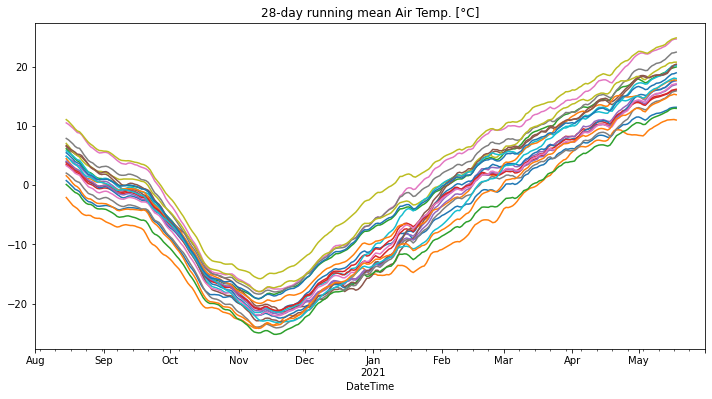

In [20]:
run_mean_28_df2.plot(legend=False, title='28-day running mean Air Temp. [°C]', figsize= (12, 6))

In [82]:
run_mean_28_provinces_cold_snaps_T = provinces_cold_snaps_T.rolling(28, center=True).mean()
run_mean_28_provinces_cold_snaps_T

,Dornogovi,Govisumber,Orkhon,Sukhbaatar,Zavkhan
DateTime,,,,,
2020-08-01,NaN,NaN,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN,NaN,NaN
2020-08-03,NaN,NaN,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN,NaN,NaN
2020-08-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-05-27,NaN,NaN,NaN,NaN,NaN
2021-05-28,NaN,NaN,NaN,NaN,NaN
2021-05-29,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'28-day running mean Air Temp. [°C]'}, xlabel='DateTime'>

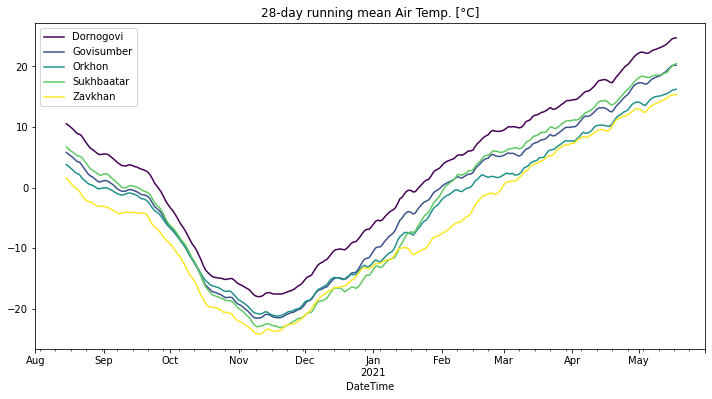

In [85]:
run_mean_28_provinces_cold_snaps_T.plot(legend=True, title='28-day running mean Air Temp. [°C]', figsize= (12, 6), cmap='viridis')

##### Combine mean and 28-running mean for SD & AT

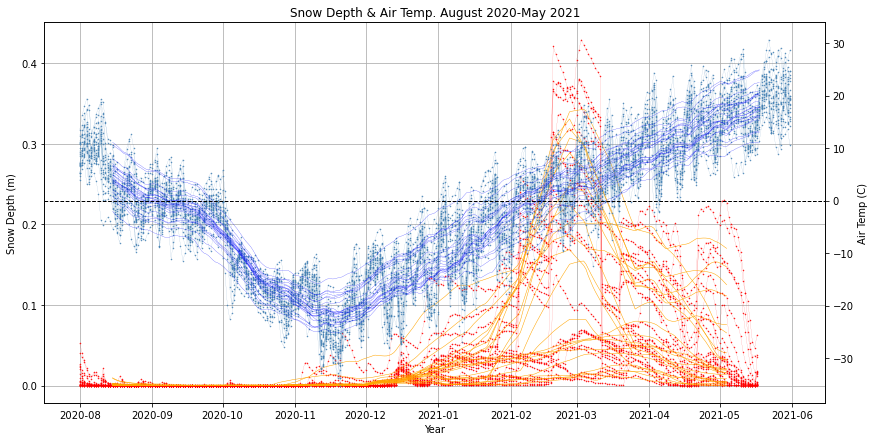

In [104]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add snow depth to plot
ax.plot(day_mean_W00_01_df1, label='Snow Depth', color='red', linewidth=0.1, marker='o', markersize=0.5)
ax.plot(run_mean_28_df1, label='Snow Depth 28-day running mean', color='orange', linewidth=0.5)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add ais temp to plot
ax2.plot(day_mean_W00_01_df2, label='Air Temp', color='steelblue', linewidth=0.1, marker='o', markersize=0.5)
ax2.plot(run_mean_28_df2, label='Air Temp 28-day running mean', color='blue', linewidth=0.20)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. August 2020-May 2021', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

##### Combine mean and 28-running mean for SD & AT for AOIs cold snaps

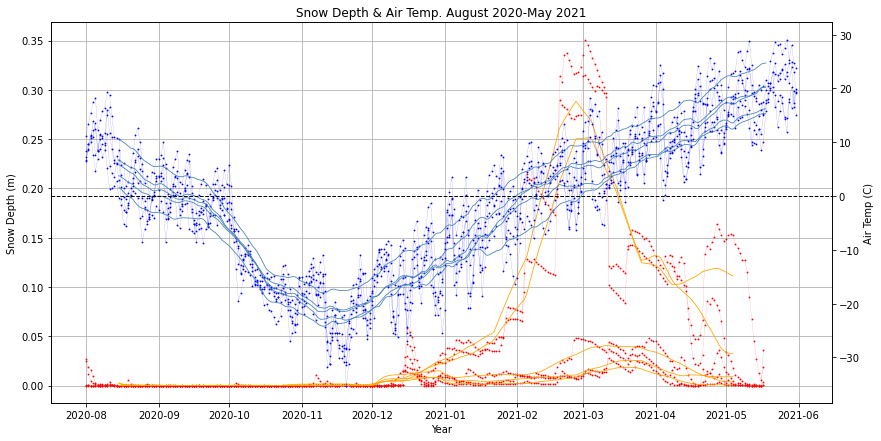

In [131]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add snow depth to plot
ax.plot(provinces_cold_snaps, label='Snow Depth', marker='o', linewidth=0.1, markersize=0.8, color='red')
ax.plot(run_mean_28_provinces_cold_snaps, label='Snow Depth 28-day running mean', color='orange', linewidth=0.8)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add axis temp to plot
ax2.plot(provinces_cold_snaps_T, label='Air Temp', linewidth=0.1, marker='o', markersize=0.8, color='blue')
ax2.plot(run_mean_28_provinces_cold_snaps_T, label='Air Temp 28-day running mean', color='steelblue', linewidth=0.8)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# add title & grid
ax.set(title='Snow Depth & Air Temp. August 2020-May 2021', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

---

### Find cold snaps = air temp. difference of at least 5 degrees between the daily mean and the 28-day running mean for at least 5 consecutive days.

##### Part I: Difference of at least 5 °C from 2020-08-01 to 2021-05-31

In [22]:
diff_day_running_AT = day_mean_W00_01_df2.abs() - run_mean_28_df2.abs()
diff_day_running_AT.head(80)

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-15,1.784637,-1.356726,-0.155881,1.992129,1.747043,2.304986,3.073626,2.080427,-0.628464,2.731041,...,1.132351,1.552985,1.205902,3.213286,2.683837,2.600943,0.079464,-0.560850,1.248642,0.250602
2020-10-16,2.071859,0.794879,0.399960,0.929677,0.458207,1.112447,2.175953,1.330101,0.351706,1.604582,...,0.449687,0.456413,-0.247848,1.746606,1.768876,2.007443,0.180988,0.027327,1.214433,1.854012
2020-10-17,1.098556,0.675945,1.343361,0.309240,-0.241545,-0.751567,0.680437,1.182242,1.021648,0.557566,...,0.938818,-0.018940,-0.674706,0.097846,1.239844,1.499938,1.122996,0.153424,1.433275,0.960082


In [23]:
diff_day_running_AT.tail(80)

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-03-13,0.495531,4.975205,1.712633,0.274167,-2.538596,-6.106111,-3.742512,-2.528213,4.703205,-3.680436,...,-0.117167,-0.273322,-2.068798,-5.508149,-2.506000,-2.531779,0.003777,5.878395,0.106132,2.847149
2021-03-14,4.102214,6.821731,5.527478,2.482838,1.093443,-4.639731,-4.035992,-1.427609,7.835902,-2.685043,...,3.963544,1.929762,0.859274,-5.786756,-1.038814,-1.706377,1.983498,8.101744,3.263478,6.979057
2021-03-15,6.523451,2.188339,5.500217,5.688222,3.938668,0.506961,0.292303,4.382489,3.418793,1.510974,...,3.944713,4.673193,3.512181,-0.570336,4.307304,3.272759,5.981121,-0.269098,7.375796,3.412898
2021-03-16,-2.698506,7.423532,-4.532871,-1.887196,-2.643247,3.820052,4.372946,-0.377464,-6.503742,1.521271,...,1.896787,-2.095892,-1.919861,5.546158,-0.962779,-1.088759,-0.227156,-5.504189,-2.330900,-2.991781
2021-03-17,-3.101742,0.742203,-5.139240,-2.451624,-2.459749,-3.206197,-4.824001,-5.312663,-4.275570,-4.931485,...,0.519305,-2.803085,-2.700256,-4.215759,-4.756367,-2.807192,-5.625617,-1.852566,-4.528852,-3.193465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
five_degrees = diff_day_running_AT[diff_day_running_AT >= 5]
five_degrees

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Drop rows which contain NaN 

five_degrees = five_degrees.dropna(axis=0, how='all')
five_degrees

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-17,5.979673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.679720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-18,7.732413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.672251,NaN,NaN,NaN,NaN,5.372947,NaN,NaN,NaN,5.346412
2020-08-25,5.530139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.997136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.166649
2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.114523,NaN,NaN,NaN,NaN
2020-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,NaN,NaN,NaN,NaN,5.466669,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.319202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.230826,NaN,5.226366,...,NaN,NaN,NaN,NaN,5.734333,5.246330,NaN,NaN,6.531577,NaN


In [26]:
five_degrees.head(50)

,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,Govisumber,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-08-17,5.979673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.679720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-18,7.732413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.672251,NaN,NaN,NaN,NaN,5.372947,NaN,NaN,NaN,5.346412
2020-08-25,5.530139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.997136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.166649
2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.114523,NaN,NaN,NaN,NaN
2020-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-03,NaN,NaN,NaN,NaN,NaN,5.024024,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.031408,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.097252
2020-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.298253,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-17,NaN,NaN,NaN,NaN,5.505247,6.367553,NaN,NaN,NaN,5.672951,...,NaN,NaN,5.465246,8.339954,5.240750,5.745130,NaN,NaN,NaN,NaN


In [27]:
#save result table as CSV 
#Change name to period of interest
five_degrees.to_csv('five_degrees_W20-21.csv')
print('new csv file from list was created... ')

new csv file from list was created... 


---

##### Part II: For at least 5 consecutive days from 2020-08-17 to 2021-05-18

In [28]:
import datetime
now = datetime.datetime.now()
print ("Current date and time: ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time: 
2022-07-03 11:45:20


In [29]:
# installing dependencies
#
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd

In [30]:
#read in five_degrees_W20-21.csv
#
cold_days_user = pd.read_csv('five_degrees_W20-21.csv')
df = pd.DataFrame(cold_days_user)
df

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Khuvsgul,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan
0,2020-08-17,5.979673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.679720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-18,7.732413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.672251,NaN,NaN,NaN,NaN,5.372947,NaN,NaN,NaN,5.346412
2,2020-08-25,5.530139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.997136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.166649
3,2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.114523,NaN,NaN,NaN,NaN
4,2020-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2021-05-05,NaN,NaN,NaN,NaN,5.466669,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,2021-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.230826,NaN,...,NaN,NaN,NaN,NaN,5.734333,5.246330,NaN,NaN,6.531577,NaN
108,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,5.672656,6.788089,NaN,...,NaN,NaN,NaN,5.100405,5.125979,6.144635,NaN,NaN,NaN,NaN


In [31]:
#Turn to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.dtypes

DateTime        datetime64[ns]
Arkhangai              float64
BayanUlgii             float64
Bayankhongor           float64
Bulgan                 float64
DarkhanUul             float64
Dornod                 float64
Dornogovi              float64
Dundgovi               float64
GoviAltai              float64
Govisumber             float64
Khentii                float64
Khovd                  float64
Khuvsgul               float64
Orkhon                 float64
Selenge                float64
Sukhbaatar             float64
Tuv                    float64
Ulaanbaatar            float64
Umnugovi               float64
Uvs                    float64
Uvurkhangai            float64
Zavkhan                float64
dtype: object

#### Make a Day column to find x consecutive days

In [32]:
df['Day'] = df['DateTime'].dt.day
df

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
0,2020-08-17,5.979673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,2020-08-18,7.732413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.372947,NaN,NaN,NaN,5.346412,18
2,2020-08-25,5.530139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.166649,25
3,2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.114523,NaN,NaN,NaN,NaN,27
4,2020-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2021-05-05,NaN,NaN,NaN,NaN,5.466669,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
106,2021-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
107,2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.230826,NaN,...,NaN,NaN,NaN,5.734333,5.246330,NaN,NaN,6.531577,NaN,10
108,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,5.672656,6.788089,NaN,...,NaN,NaN,5.100405,5.125979,6.144635,NaN,NaN,NaN,NaN,11


In [33]:
df.head(90)

,DateTime,Arkhangai,BayanUlgii,Bayankhongor,Bulgan,DarkhanUul,Dornod,Dornogovi,Dundgovi,GoviAltai,...,Orkhon,Selenge,Sukhbaatar,Tuv,Ulaanbaatar,Umnugovi,Uvs,Uvurkhangai,Zavkhan,Day
0,2020-08-17,5.979673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,2020-08-18,7.732413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.372947,NaN,NaN,NaN,5.346412,18
2,2020-08-25,5.530139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.166649,25
3,2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.114523,NaN,NaN,NaN,NaN,27
4,2020-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021-03-30,NaN,NaN,NaN,5.772749,7.371040,NaN,NaN,NaN,NaN,...,6.777879,7.235033,NaN,5.851009,5.969469,NaN,NaN,NaN,NaN,30
86,2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,6.277409,6.082694,NaN,...,NaN,NaN,6.452658,6.121344,6.446636,NaN,NaN,NaN,NaN,31
87,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,5.923707,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
88,2021-04-02,5.895826,NaN,NaN,5.949603,5.815164,NaN,6.412877,7.177907,NaN,...,5.537802,5.343116,6.064357,7.402273,7.080791,5.011536,NaN,5.454790,5.675713,2


---

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      110 non-null    datetime64[ns]
 1   Arkhangai     40 non-null     float64       
 2   BayanUlgii    36 non-null     float64       
 3   Bayankhongor  20 non-null     float64       
 4   Bulgan        27 non-null     float64       
 5   DarkhanUul    35 non-null     float64       
 6   Dornod        29 non-null     float64       
 7   Dornogovi     35 non-null     float64       
 8   Dundgovi      25 non-null     float64       
 9   GoviAltai     20 non-null     float64       
 10  Govisumber    41 non-null     float64       
 11  Khentii       34 non-null     float64       
 12  Khovd         21 non-null     float64       
 13  Khuvsgul      30 non-null     float64       
 14  Orkhon        29 non-null     float64       
 15  Selenge       31 non-null     float64   

##### Automate the following code to run in a loop for each province:

In [35]:
# Import dependences
#
from itertools import groupby
from operator import itemgetter

# Subset province and days columns by index
#
i = 1
empty_list = []

# Loop
#
while i < 23:
    df_province = df.iloc[:, [0,i,23]]
    
    # Drop rows which contain NaN 
    df_province_dropna = df_province.dropna(axis=0, how='any')
    
    # Check each province for 5 or more consecutive days on province then add to loop for all provinces
    # Convert an Individual Column in the DataFrame into a List
    day_list = df_province_dropna['Day'].values.tolist() 
    empty_list.append(day_list)
    print(day_list)
    i += 1


[17, 18, 25, 5, 6, 27, 28, 12, 13, 17, 18, 19, 20, 29, 9, 10, 11, 15, 16, 27, 28, 29, 11, 12, 13, 31, 1, 23, 26, 27, 1, 3, 4, 15, 21, 2, 3, 17, 18, 19]
[3, 4, 5, 26, 27, 12, 17, 18, 19, 20, 8, 9, 10, 26, 27, 28, 10, 11, 12, 16, 29, 30, 31, 6, 7, 8, 9, 14, 16, 20, 21, 9, 10, 16, 17, 18]
[6, 28, 13, 18, 19, 20, 10, 11, 16, 11, 12, 13, 31, 1, 5, 14, 15, 21, 11, 18]
[28, 12, 13, 14, 19, 20, 10, 11, 16, 28, 29, 11, 12, 13, 31, 1, 20, 1, 3, 4, 15, 30, 2, 3, 17, 18, 19]
[17, 12, 13, 14, 17, 19, 20, 11, 12, 15, 16, 17, 28, 29, 30, 11, 12, 13, 16, 27, 31, 1, 19, 20, 1, 3, 4, 30, 2, 3, 17, 18, 19, 4, 5]
[3, 17, 18, 6, 29, 13, 20, 21, 2, 12, 14, 16, 17, 18, 29, 31, 1, 6, 12, 13, 17, 4, 5, 9, 3, 19, 20, 21, 26]
[26, 7, 29, 13, 18, 20, 21, 12, 16, 17, 29, 31, 1, 12, 13, 17, 22, 25, 26, 6, 7, 4, 5, 6, 7, 8, 31, 1, 2, 3, 4, 19, 20, 24, 11]
[6, 12, 13, 18, 19, 20, 11, 16, 28, 29, 12, 13, 17, 25, 27, 4, 5, 6, 31, 2, 3, 18, 19, 10, 11]
[5, 6, 13, 18, 19, 20, 9, 10, 11, 11, 12, 13, 30, 31, 1, 14, 21, 10,

In [36]:
i=0
while i in range(0,22):
    data = empty_list[i]
    for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
        b = (list(map(itemgetter(1), g)))
        if len(b) >= 5:
            print(b)
    i += 1
    

[4, 5, 6, 7, 8]
[17, 18, 19, 20, 21]


In [37]:
snap1 = df.iloc[23:28, [0,22]]
snap1

,DateTime,Zavkhan
23,2020-11-17,6.332831
24,2020-11-18,6.494854
25,2020-11-19,7.293992
26,2020-11-20,7.349922
27,2020-11-21,5.295991


In [38]:
snap2 = df.iloc[43:48, [0,16]]
snap2

,DateTime,Sukhbaatar
43,2020-12-29,7.641088
44,2020-12-30,6.415267
45,2020-12-31,11.311697
46,2021-01-01,7.710280
47,2021-01-06,5.868709


In [39]:
snap3 = df.iloc[49:54, [0,14]]
snap3

,DateTime,Orkhon
49,2021-01-11,8.373656
50,2021-01-12,9.969271
51,2021-01-13,6.676160
52,2021-01-16,6.843846
53,2021-01-17,6.195996


In [40]:
snap4 = df.iloc[86:91, [0,10]]
snap4

,DateTime,Govisumber
86,2021-03-31,6.807023
87,2021-04-01,5.741527
88,2021-04-02,7.496893
89,2021-04-03,11.016967
90,2021-04-04,6.474708


In [41]:
snap5 = df.iloc[72:77, [0,7]] 
snap5

,DateTime,Dornogovi
72,2021-03-04,8.238733
73,2021-03-05,5.812136
74,2021-03-06,7.052338
75,2021-03-07,5.009475
76,2021-03-08,5.928414


In [42]:
snap6 = df.iloc[86:91, [0,7]]
snap6

,DateTime,Dornogovi
86,2021-03-31,6.277409
87,2021-04-01,5.923707
88,2021-04-02,6.412877
89,2021-04-03,9.799531
90,2021-04-04,8.001705


##### 6 cold snaps from 8/17/2020 to 5/18/2021

---

#### Add Cold Snaps to Plot

---

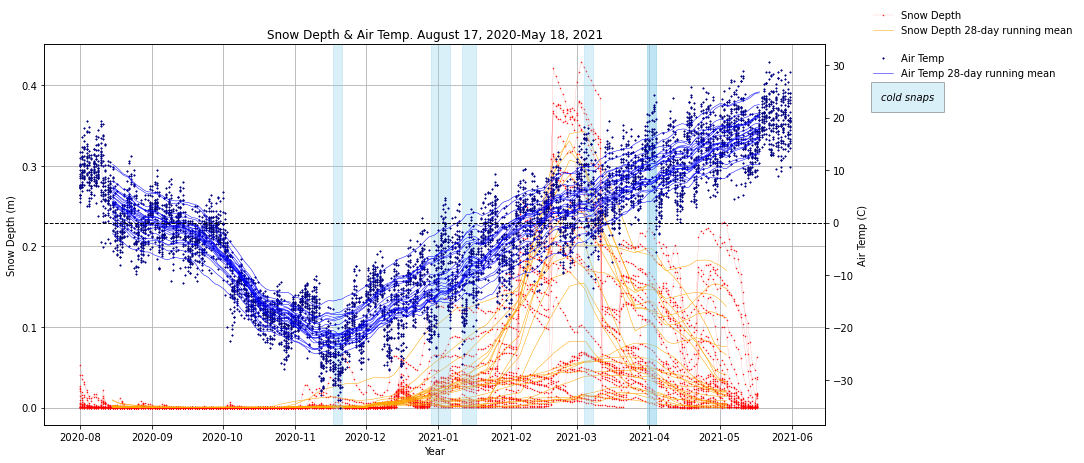

In [149]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add snow depth to plot
ax.plot(day_mean_W00_01_df1, label='Snow Depth', color='red', linewidth=0.1, marker='o', markersize=0.5)
ax.plot(run_mean_28_df1, label='Snow Depth 28-day running mean', color='orange', linewidth=0.5)

#add legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='lower left', frameon=False)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add axis temp to plot
ax2.plot(day_mean_W00_01_df2, label='Air Temp', color='navy', linewidth=0.01, marker='*', markersize=1.5)
ax2.plot(run_mean_28_df2, label='Air Temp 28-day running mean', color='blue', linewidth=0.5)
#add second y-axis label
ax2.set_ylabel('Air Temp (C)')
#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

#add cold snaps
#Zavkhan
ax2.axvspan('2020-11-17', '2020-11-21', color="skyblue", alpha=0.3)

#Sukhbaatar
ax2.axvspan('2020-12-29', '2021-01-06', color="skyblue", alpha=0.3)

#Orkhon
ax2.axvspan('2021-01-11', '2021-01-17', color="skyblue", alpha=0.3)

#Dornogovi
ax2.axvspan('2021-03-04', '2021-03-08', color="skyblue", alpha=0.3)
ax2.axvspan('2021-03-31', '2021-04-04', color="skyblue", alpha=0.3)

#Govisumber
ax2.axvspan('2021-03-31', '2021-04-04', color="skyblue", alpha=0.3)

#add cold snaps legend
text_pos_x = 0.955
text_pos_y = 0.77
ax.text(text_pos_x, text_pos_y, "cold snaps", transform=plt.gcf().transFigure, style='italic',
        bbox={'facecolor': 'skyblue', 'alpha': 0.3, 'pad': 10})

# add title & grid 
ax.set(title='Snow Depth & Air Temp. August 17, 2020-May 18, 2021', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

#add legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='upper left', frameon=False)


---

#### Classify cold snaps into types of dzud

##### Check for black/cold/combined(cold+white) dzuds within cold snaps dates

In [155]:
#Snow Depth Zavkhan
black_dzud_dates = day_mean_df1.loc['2020-11-17' : '2020-11-21']
black_dzud_dates['Zavkhan']
#Virtually no snow + cold snap = black dzud

DateTime
2020-11-17    0.000352
2020-11-18    0.000500
2020-11-19    0.000089
2020-11-20    0.001108
2020-11-21    0.000477
Freq: D, Name: Zavkhan, dtype: float64

In [159]:
#Snow Depth Sukhbaatar
black_dzud_dates1 = day_mean_df1.loc['2020-12-29' : '2021-01-06']
black_dzud_dates1['Sukhbaatar']
#Cold dzud

DateTime
2020-12-29    0.007896
2020-12-30    0.009874
2020-12-31    0.009113
2021-01-01    0.008428
2021-01-02    0.008147
2021-01-03    0.007989
2021-01-04    0.007697
2021-01-05    0.006927
2021-01-06    0.003883
Freq: D, Name: Sukhbaatar, dtype: float64

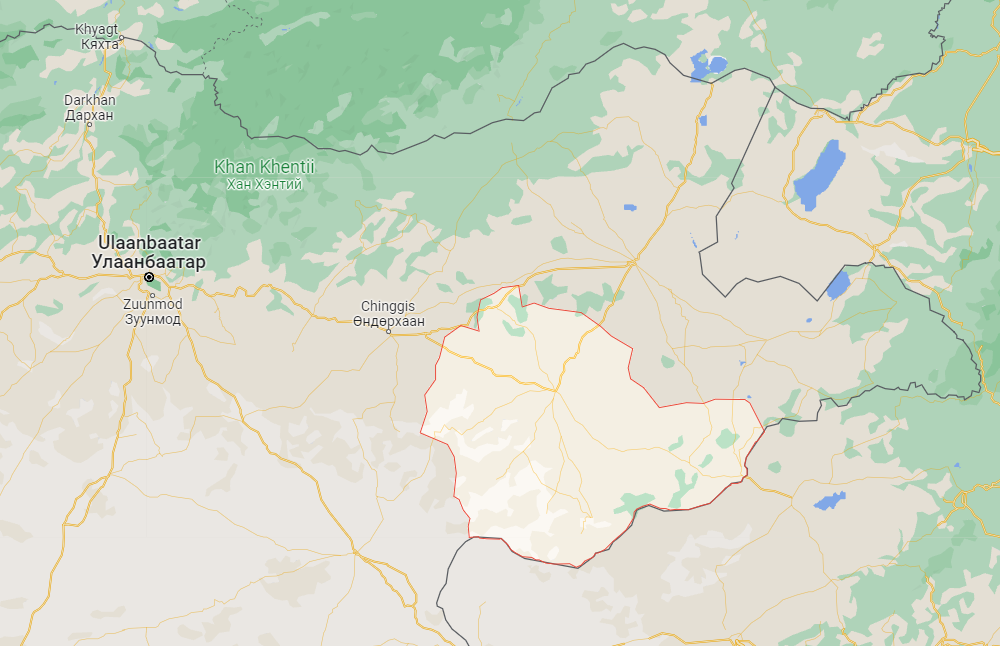
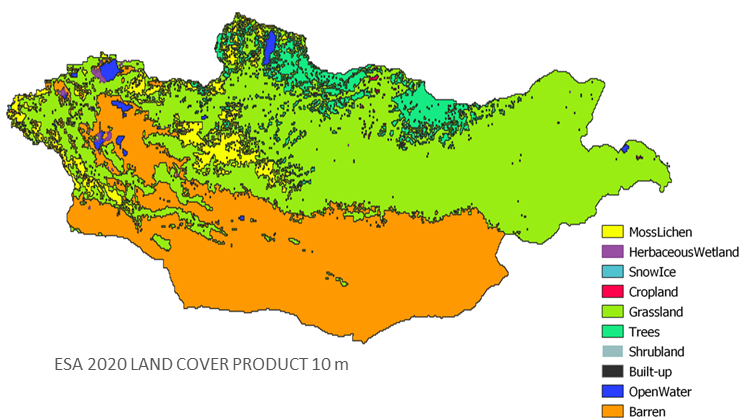
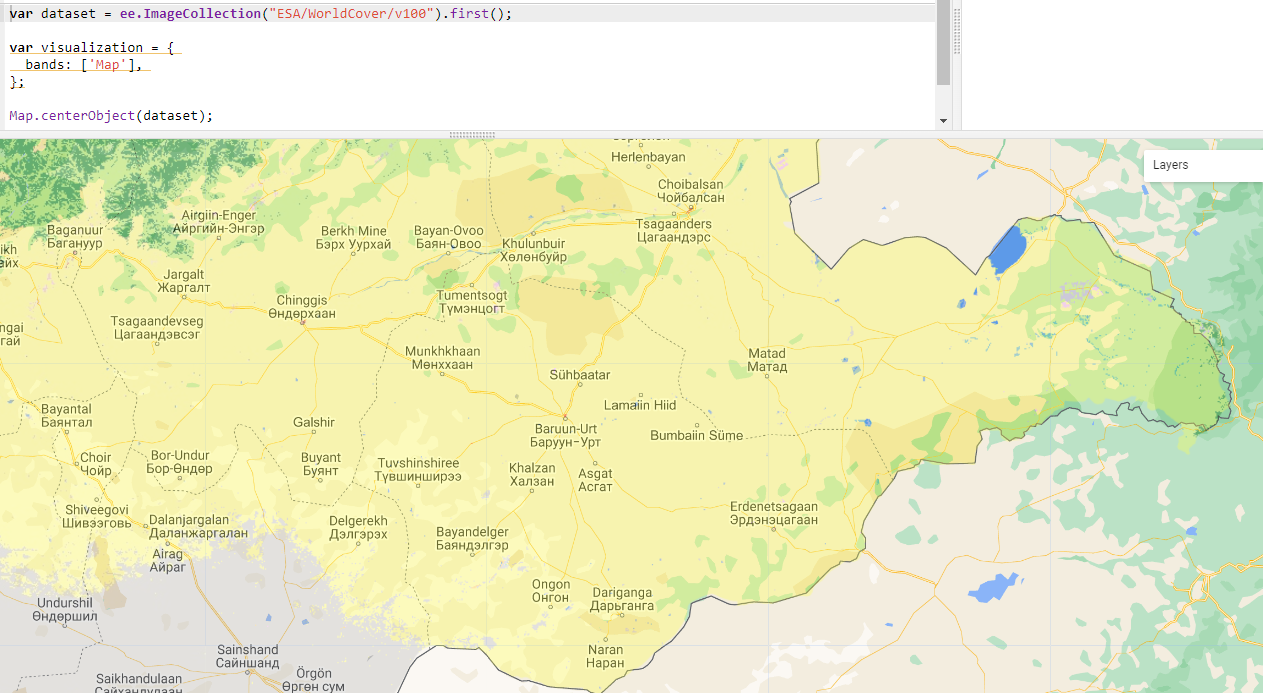
##### Sukhbaatar is grassland
16 cm in steppes so not enough snow to be classified as white dzud
### =Cold Dzud

In [160]:
#Snow Depth Orkhon
black_dzud_dates2 = day_mean_df1.loc['2021-01-11' : '2021-01-17']
black_dzud_dates2['Orkhon']
#Virtually no snow + cold snap = black dzud

DateTime
2021-01-11    0.045782
2021-01-12    0.044092
2021-01-13    0.041838
2021-01-14    0.039023
2021-01-15    0.037083
2021-01-16    0.035326
2021-01-17    0.035832
Freq: D, Name: Orkhon, dtype: float64

In [162]:
#Snow Depth Dornogovi1
black_dzud_dates3 = day_mean_df1.loc['2021-03-04' : '2021-03-08']
black_dzud_dates3['Dornogovi']
#Virtually no snow + cold snap = black dzud

DateTime
2021-03-04    0.011914
2021-03-05    0.011034
2021-03-06    0.010343
2021-03-07    0.009685
2021-03-08    0.009067
Freq: D, Name: Dornogovi, dtype: float64

In [163]:
#Snow Depth Dornogovi2
black_dzud_dates4 = day_mean_df1.loc['2021-03-31' : '2021-04-04']
black_dzud_dates4['Dornogovi']
#Virtually no snow + cold snap = black dzud

DateTime
2021-03-31    0.016218
2021-04-01    0.014363
2021-04-02    0.012833
2021-04-03    0.010459
2021-04-04    0.007078
Freq: D, Name: Dornogovi, dtype: float64

In [164]:
#Snow Depth Govisumber
black_dzud_dates5 = day_mean_df1.loc['2021-03-31' : '2021-04-04']
black_dzud_dates5['Govisumber']
#Virtually no snow + cold snap = black dzud

DateTime
2021-03-31    0.022512
2021-04-01    0.020503
2021-04-02    0.018932
2021-04-03    0.017187
2021-04-04    0.014051
Freq: D, Name: Govisumber, dtype: float64

### Plot

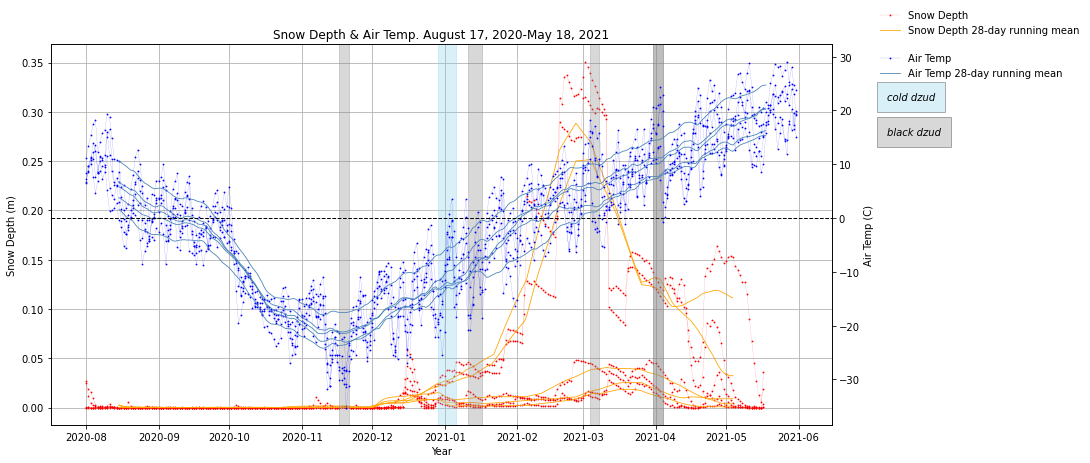

In [165]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add snow depth to plot
ax.plot(provinces_cold_snaps, label='Snow Depth', marker='o', linewidth=0.1, markersize=0.8, color='red')
ax.plot(run_mean_28_provinces_cold_snaps, label='Snow Depth 28-day running mean', color='orange', linewidth=0.8)

#add snow depth legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='lower left', frameon=False)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add air temp to plot
ax2.plot(provinces_cold_snaps_T, label='Air Temp', linewidth=0.1, marker='o', markersize=0.8, color='blue')
ax2.plot(run_mean_28_provinces_cold_snaps_T, label='Air Temp 28-day running mean', color='steelblue', linewidth=0.8)

#add second y-axis label
ax2.set_ylabel('Air Temp (C)')

#add line at 0 C
ax2.axhline(0, linestyle = 'dashed', c='black', linewidth = 1)

# Classify cold snaps
#
#Zavkhan
ax2.axvspan('2020-11-17', '2020-11-21', color="grey", alpha=0.3)

#Sukhbaatar
ax2.axvspan('2020-12-29', '2021-01-06', color="skyblue", alpha=0.3)

#Orkhon
ax2.axvspan('2021-01-11', '2021-01-17', color="grey", alpha=0.3)

#Dornogovi
ax2.axvspan('2021-03-04', '2021-03-08', color="grey", alpha=0.3)
ax2.axvspan('2021-03-31', '2021-04-04', color="grey", alpha=0.3)

#Govisumber
ax2.axvspan('2021-03-31', '2021-04-04', color="grey", alpha=0.3)

#add cold dzud legend
text_pos_x = 0.955
text_pos_y = 0.77
ax.text(text_pos_x, text_pos_y, "cold dzud", transform=plt.gcf().transFigure, style='italic',
        bbox={'facecolor': 'skyblue', 'alpha': 0.3, 'pad': 10})

#add black dzud legend
text_pos_x = 0.955
text_pos_y = 0.70
ax.text(text_pos_x, text_pos_y, "black dzud", transform=plt.gcf().transFigure, style='italic',
        bbox={'facecolor': 'grey', 'alpha': 0.3, 'pad': 10})

#add air temp. legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0), loc='upper left', frameon=False)

# add title & grid 
ax.set(title='Snow Depth & Air Temp. August 17, 2020-May 18, 2021', xlabel='Year', ylabel='Snow Depth (m)')
ax.grid()

# Find white dzuds for W2020-2021